In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
features = np.load('/content/drive/MyDrive/To share/Deep Learning Assignment/Official_data/data.npy')
labels = np.load('/content/drive/MyDrive/To share/Deep Learning Assignment/Official_data/labels.npy')

# 0. Imports and data loading

In [ ]:
'''
All packages and modules are imported in the "functions.py" file located next to this notebook

Additionally a number of code chunks employed in previous versions of this notebook have been
defined into functions and placed in that same file in order to simplify the exposition of the 
main points and results of the assignment. For further insight on the code behind the actions
here executed this "functions.py" file can be visited, there all the details can be found.

IMPORTANT: for the appropriate functioning of this notebook it must be placed in the same 
directory as "functions.py"
'''

from functions import *

In [ ]:
features = np.load('data/data.npy')
labels = np.load('data/labels.npy')

# 1. Data preprocessing



### 1.1 Splitting Data

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

### Extra: Easy going here! - Sample restriction 😎🤙🌴  \#prayforkernel 🙏

In [19]:
#############################################
#             CONTROL PANEL (Only restriction)

# Sample restriction
restriction = True
address_vp_imbalance = True
proportion = 0.99
#                                           
#############################################

In [20]:
if restriction == True:
    
    if address_vp_imbalance == True:
        
        restricted_sample_train, restricted_sample_labels_train = restrict_sample_vp_imb(proportion , X_train, y_train)
        restricted_sample_val, restricted_sample_labels_val = restrict_sample_vp_imb(proportion , X_val, y_val)
        restricted_sample_test, restricted_sample_labels_test = restrict_sample_vp_imb(proportion , X_test, y_test)
        generate_summary("R", y_train, restricted_sample_labels_train)
        
    else:

        restricted_sample_train, restricted_sample_labels_train = restrict_sample(proportion , X_train, y_train)
        restricted_sample_val, restricted_sample_labels_val = restrict_sample(proportion , X_val, y_val)
        restricted_sample_test, restricted_sample_labels_test = restrict_sample(proportion , X_test, y_test)
        generate_summary("R", y_train, restricted_sample_labels_train)
        
        
    X_train = np.array(restricted_sample_train)
    y_train = np.array(restricted_sample_labels_train)
    X_val = np.array(restricted_sample_val)
    y_val = np.array(restricted_sample_labels_val)
    X_test = np.array(restricted_sample_test)
    y_test = np.array(restricted_sample_labels_test)

SAMPLE RESTRICTION SUMMARY
(Only covering training sample)


ORIGINAL TRAINING SAMPLE
Original number of instances: 4147
Original instance distribution by class: 
 Bacterial Pneumonia       1689
Viral Pneumonia           1182
No Pneumonia (healthy)     963
COVID-19                   313
dtype: int64

NEW TRAINING SAMPLE
Number of instances in new sample: 4083
Instance distribution by class in new sample: 
 Bacterial Pneumonia       1672
Viral Pneumonia           1145
No Pneumonia (healthy)     953
COVID-19                   313
dtype: int64


### 1.2 Normalize Data

In [21]:
# Float conversion to allow normalization
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_val=X_val.astype('float32')

# Normalization 
X_train=X_train/255.0
X_test=X_test/255.0
X_val=X_val/255.0

# Compute the mean and standard deviation of the training set for standardization (NOT USED)
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)

# Standardization (NOT USED)
X_train_norm = (X_train - train_mean) / train_std
X_val_norm = (X_val - train_mean) / train_std
X_test_norm = (X_test - train_mean) / train_std


### 1.3 Categorical encoding

In [22]:
# Define a dictionary that maps each category to a numerical value
label_map = {"Bacterial Pneumonia": 0, "Viral Pneumonia": 1, "No Pneumonia (healthy)": 2, "COVID-19": 3}

# Encode the categorical labels as numerical values using the label map
y_train_encoded = np.vectorize(label_map.get)(y_train)
y_val_encoded = np.vectorize(label_map.get)(y_val)
y_test_encoded = np.vectorize(label_map.get)(y_test)

# Convert the numerical labels to one-hot encoded format
num_classes = 4
y_train_onehot = keras.utils.to_categorical(y_train_encoded, num_classes=num_classes)
y_val_onehot = keras.utils.to_categorical(y_val_encoded, num_classes=num_classes)
y_test_onehot = keras.utils.to_categorical(y_test_encoded, num_classes=num_classes)



# 2. Baseline Model

### 2.1 Create baseline model

In [ ]:

from functions import build_baseline_model()

baseline_model = build_baseline_model()

# Train the model for 10 epochs with a batch size of 32
history = baseline_model.fit(
    X_train_norm,
    y_train_onehot,
    batch_size=32,
    epochs=10,
    validation_data=(X_val_norm, y_val_onehot)
)


2023-03-04 09:02:23.053470: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-04 09:02:23.055078: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-04 09:02:23.056046: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (be39edd05863): /proc/driver/nvidia/version does not exist
2023-03-04 09:02:23.064725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-04 09:02:23.682938: W tensorflow/tsl/framework/cpu_allocator_im

Epoch 1/10


2023-03-04 09:02:27.128376: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 194281472 exceeds 10% of free system memory.
2023-03-04 09:02:29.578815: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 194281472 exceeds 10% of free system memory.



 1/40 [..............................] - ETA: 4:38 - loss: 1.3875 - accuracy: 0.2500

2023-03-04 09:02:31.498282: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 194281472 exceeds 10% of free system memory.
2023-03-04 09:02:33.262060: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 194281472 exceeds 10% of free system memory.


40/40 [==============================] - 156s 4s/step - loss: 1.1333 - accuracy: 0.5354 - val_loss: 0.9355 - val_accuracy: 0.6280
Epoch 2/10
40/40 [==============================] - 147s 4s/step - loss: 0.8364 - accuracy: 0.6630 - val_loss: 0.9171 - val_accuracy: 0.6469
Epoch 3/10
40/40 [==============================] - 145s 4s/step - loss: 0.7316 - accuracy: 0.7126 - val_loss: 0.8077 - val_accuracy: 0.6801
Epoch 4/10
40/40 [==============================] - 142s 4s/step - loss: 0.6202 - accuracy: 0.7567 - val_loss: 0.8000 - val_accuracy: 0.6943
Epoch 5/10
40/40 [==============================] - 133s 3s/step - loss: 0.5285 - accuracy: 0.7882 - val_loss: 0.9739 - val_accuracy: 0.6706
Epoch 6/10
40/40 [==============================] - 132s 3s/step - loss: 0.5007 - accuracy: 0.7882 - val_loss: 0.7928 - val_accuracy: 0.6777
Epoch 7/10
40/40 [==============================] - 131s 3s/step - loss: 0.3847 - accuracy: 0.8409 - val_loss: 0.9787 - val_accuracy: 0.6872
Epoch 8/10
40/40 [======

In [ ]:
baseline_all_val_acc = np.mean(history.history["val_accuracy"])
baseline_all_val_loss = np.mean(history.history["val_loss"])
baseline_all_train_acc = np.mean(history.history["accuracy"])
baseline_all_train_loss = np.mean(history.history["loss"])
print("BASELINE RESULTS:")
print("-"*len("BASELINE RESULTS:"))
print()
print("**Training**")
print("The average training accuracy among all epochs is: {:.4}".format(baseline_all_train_acc))
print("The average training loss among all epochs is: {:.4}".format(baseline_all_train_loss))
print()
print("**Validation**")
print("The average validation accuracy among all epochs is: {:.4}".format(baseline_all_val_acc))
print("The average validation loss among all epochs is: {:.4}".format(baseline_all_val_loss))

### 2.2 Analyze the performance of the baseline model

In [ ]:
import matplotlib.pyplot as plt

def plot_acc_loss(histo):
  ##Plot for the accuracy of the baseline model 
  accuracy_train = histo.history['accuracy']
  accuracy_val = histo.history['val_accuracy']
  plt.plot(accuracy_train, label='training_accuracy')
  plt.plot(accuracy_val, label='validation_accuracy')
  plt.title('ACCURACY OF THE MODEL')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  ##Plot for the loss of the baseline model 
  loss_train = histo.history['loss']
  loss_val = histo.history['val_loss']
  plt.plot(loss_train, label='training_loss')
  plt.plot(loss_val, label='validation_loss')
  plt.title('LOSS OF MODEL')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  return 


##------ploting from BASELINE only 
plot_acc_loss(history)


##----Getting prediction based in the baseline model 
y_pred = baseline_model.predict(X_test_norm) 

def plot_ROC_curve(y_predict,y_test,num_clas): 
  from sklearn.metrics import roc_curve, auc
  import matplotlib.pyplot as plt
  fpr = {}
  tpr = {}
  roc_auc = {}
  #calculating roc for each class
  for i in range(num_clas):
      fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_predict[:,i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  from sklearn.metrics import roc_auc_score
  # calculating micro-average ROC curve and  area
  fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_predict.ravel())
  roc_auc_micro = roc_auc_score(y_test.ravel(), y_predict.ravel())

  # Compute macro-average ROC curve and  area
  fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(num_clas)]))
  tpr_macro = np.zeros_like(fpr_macro)
  for i in range(num_clas):
      tpr_macro += np.interp(fpr_macro, fpr[i], tpr[i])
  tpr_macro /= num_clas
  roc_auc_macro = auc(fpr_macro, tpr_macro)

  #Plot the ROC curve for each class using matplotlib.pyplot.plot()
  plt.figure(figsize=(10, 5))
  lw = 2
  for i in range(num_clas):
      plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.plot(fpr_micro, tpr_micro,lw=lw, linestyle='--', label='micro-average ROC curve (area = %0.2f)' % (roc_auc_micro))
  plt.plot(fpr_macro, tpr_macro,lw=lw, linestyle='--', label='macro-average ROC curve (area = %0.2f)' % (roc_auc_macro))
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic of Multiclass')
  plt.legend(loc="lower right")
  plt.show()
  return 


#-------Plot ROC of the baselinemodel 
plot_ROC_curve(y_pred,y_test_onehot, num_classes)


def plot_cm(label_ma,y_predict,y_tes):
  #reversing pred to categorical so to get the labels 
  inverse_label_map = {v: k for k, v in label_ma.items()}  # invert the label_map
  y_pred_decoded_numerical = np.argmax(y_predict, axis=1)
  y_pred_decoded_categorical = np.vectorize(inverse_label_map.get)(y_pred_decoded_numerical)

  #confusion matrix 
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(y_tes, y_pred_decoded_categorical)
  classes = np.unique(y_tes)
  # plot the confusion matrix
  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap='Reds')
  ax.figure.colorbar(im, ax=ax)
  ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=classes, yticklabels=classes, ylabel='True label', xlabel='Predicted label')

  # rotate the labels
  plt.setp(ax.get_xticklabels(), rotation=20, ha="right", rotation_mode="anchor")
  # text annotations like the numbers inside 
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
  plt.show()
  return

##----CM Matrix plot
plot_cm(label_map,y_pred,y_test)


def table_p_r_f1(y_tes,y_predict, label_ma):
  from sklearn.metrics import classification_report
  inverse_label_map = {v: k for k, v in label_ma.items()}  # invert the label_map
  y_pred_decoded_numerical = np.argmax(y_predict, axis=1)
  y_pred_decoded_categorical = np.vectorize(inverse_label_map.get)(y_pred_decoded_numerical)

  print(classification_report(y_test, y_pred_decoded_categorical))

#precision and recall and f1-score, accuracy 
table_p_r_f1(y_test,y_pred,label_map)

NameError: name 'history2' is not defined

# 3. Adapting/fine-tuning the network

In [ ]:
#############################################
#             CONTROL PANEL (Fine tuning)

# Sample restriction
restriction = True
address_vp_imbalance = True
proportion = 0.25

# Sample augmentation
augmentation_flip = True                       
augmentation_rotate = True

#                                           
#############################################


# safety mechanism: augmentation and restriction are not meant to be combined
if restriction == True:
    agumentation_flip = False
    augmentation_rotate = False

### 3.1 Data augmentation/restriction

In [ ]:
if restriction == True:
    
    if address_vp_imbalance == True:
        restricted_sample_train, restricted_sample_labels_train = restrict_sample_vp_imb(proportion , X_train, y_train)
        generate_summary("R", y_train, restricted_sample_labels_train)
        X_train = np.array(restricted_sample_train)
        y_train = np.array(restricted_sample_labels_train)
        
    else:
        restricted_sample_train, restricted_sample_labels_train = restrict_sample(proportion , X_train, y_train)
        generate_summary("R", y_train, restricted_sample_labels_train)
        X_train = np.array(restricted_sample_train)
        y_train = np.array(restricted_sample_labels_train)

elif augmentation_flip == True:

    augmentedfeatures, augmentedlabels = augment_sample(X_train, y_train, a_rotate=augmentation_rotate)
    generate_summary("R", y_train, augmentedlabels)
    X_train = np.array(augmentedfeatures)
    y_train = np.array(augmentedlabels)
    
else:
    print("NEITHER SAMPLE RESTRICTION NOR AUGMENTATION WERE NOT CONDUCTED")

### 3.3 [DISABLED] Categorical encoding of new labels

In [ ]:
## Define a dictionary that maps each category to a numerical value
#label_map = {"Bacterial Pneumonia": 0, "Viral Pneumonia": 1, "No Pneumonia (healthy)": 2, "COVID-19": 3}
#
## Encode the categorical labels as numerical values using the label map
#y_train_encoded = np.vectorize(label_map.get)(y_train)
#y_val_encoded = np.vectorize(label_map.get)(y_val)
#y_test_encoded = np.vectorize(label_map.get)(y_test)
#
## Convert the numerical labels to one-hot encoded format
#num_classes = 4
#y_train_onehot = keras.utils.to_categorical(y_train_encoded, num_classes=num_classes)
#y_val_onehot = keras.utils.to_categorical(y_val_encoded, num_classes=num_classes)
#y_test_onehot = keras.utils.to_categorical(y_test_encoded, num_classes=num_classes)

### 3.4 Network fine tuning

In [ ]:
#This cell was created to find the optimal LR for SGD. However it didn't improve baseline's Adam:

from tensorflow import keras
import keras.backend as K
import matplotlib.pyplot as plt

from functions import lr_schedule() 
from functions import plot_lr_schedule()

# Adding a Lr Scheduler to check the learning rate evolution during training and to avoid overfitting
initial_lr = 0.001
final_lr = 0.01
baseline_epochs = 10

lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: lr_schedule(epoch, initial_lr, final_lr, baseline_epochs))

baseline_model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train the model for 4 epochs with a batch size of 32
history = baseline_model.fit(
    X_train_norm,
    y_train_onehot,
    batch_size=32,
    epochs=baseline_epochs,
    validation_data=(X_val_norm, y_val_onehot),
    callbacks=[lr_scheduler]
)


In [ ]:
# Rule of thumb: optimal will be a bit lower than when lr starts climbing, usually 10 times lower the climb up point (around 0.005)
plot_lr_schedule(initial_lr, final_lr, baseline_epochs)

In [ ]:
"""from keras import backend as K

# Some memory clean-up
K.clear_session()"""

In [ ]:
# TUNED MODEL 1: BASELINE + LR: Nadam + KFOLD VALIDATION + EARLY STOPPING + LeakyReLU + Extra Dense layer + 3 Dropout layers + Doubled batch size to 64
# FAILED CHANGES VS BASELINE INDICATED WITH A HASHTAG

from tensorflow.keras.layers import LeakyReLU
from functions import build_tuned_model()
tuned_m_batch = 64

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_h_model():
    '''restnet blocks'''
    input_shape = (156, 156, 3)
    inputs = keras.Input(shape=input_shape)
     # Convolutional layers
    x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.01),  padding='same')(inputs)
    x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3),  activation=keras.layers.LeakyReLU(alpha=0.01), padding='same')(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    #  block 1
    out=x
    x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.1), padding='same')(x)
    x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3),  activation=keras.layers.LeakyReLU(alpha=0.1), padding='same')(x)
    x = keras.layers.add([out, x])
    x = keras.layers.LeakyReLU(alpha=0.1)(x)

    #  block 2
    out=x
    x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.1), padding='same')(x)
    x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3),  activation=keras.layers.LeakyReLU(alpha=0.1), padding='same')(x)
    x = keras.layers.add([out, x])
    x = keras.layers.LeakyReLU(alpha=0.1)(x)
    #  block 3
    out=x
    x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.1), padding='same')(x)
    x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3),  activation=keras.layers.LeakyReLU(alpha=0.1), padding='same')(x)
    x = keras.layers.add([out, x])
    x = keras.layers.LeakyReLU(alpha=0.1)(x)
    # Dense layers
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1))(x)
    x = keras.layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1))(x)
    outputs = keras.layers.Dense(4, activation='softmax')(x)
    optim = keras.optimizers.Nadam(learning_rate=0.001) 


    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs, name='h_model')

    # Compile the model with appropriate loss function, optimizer, and metrics
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    return model


hybrid_model = build_h_model()

# Train the model for 10 epochs with a batch size of 32
'''history = hybrid_model.fit(
    X_train_norm,
    y_train_onehot,
    batch_size=32,
    epochs=10,
    validation_data=(X_val_norm, y_val_onehot))'''


In [ ]:
# K FOLD VALIDATION (5 max epochs for speeding purposes)

from sklearn.model_selection import KFold

k = 4
num_val_samples = len(X_train_norm) // k 
num_epochs = 5
tuned_all_val_losses = [] # Should add the score of each run at the end of the loop
tuned_all_val_acc = []
base_all_val_losses = []
base_all_val_acc = []
res_all_val_acc=[]
res_all_val_losses=[]

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X_train_norm[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = y_train_onehot[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X_train_norm[:i * num_val_samples],
         X_train_norm[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train_onehot[:i * num_val_samples],
         y_train_onehot[(i + 1) * num_val_samples:]],
        axis=0)
    # (CHANGE VS BASELINE)Defining EarlyStopping callback
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

    baseline_model = build_baseline_model()
    tuned_model_1 = build_tuned_model()
    hybrid_model = build_h_model()
    

    # Train baseline and tuned models for 4 epochs with a batch size of 32
    print('processing baseline model')
    baseline_history = baseline_model.fit(
        partial_train_data,
        partial_train_targets,
        batch_size=32,
        epochs=num_epochs,
        validation_data=(val_data, val_targets),
    )
    print('processing tuned model')
    tuned_history = tuned_model_1.fit(
        partial_train_data,
        partial_train_targets,
        batch_size=tuned_m_batch,
        epochs=num_epochs,
        validation_data=(val_data, val_targets),
        callbacks=[early_stopping]
    )
    print('processing hibrid model 1')
    h_history= hybrid_model.fit(
        partial_train_data,
        partial_train_targets,
        batch_size=32,
        epochs=num_epochs,
        validation_data=(val_data, val_targets),
        callbacks=[early_stopping]
    )
    # Evaluate the kfold results for BASELINE
    base_val_loss, base_val_accuracy = baseline_model.evaluate(val_data, val_targets, verbose=0)
    base_all_val_losses.append(base_val_loss)
    base_all_val_acc.append(base_val_accuracy)

    # Evaluate the kfold results for the tuned model
    tuned_val_loss, tuned_val_accuracy = tuned_model_1.evaluate(val_data, val_targets, verbose=0)
    tuned_all_val_losses.append(tuned_val_loss)
    tuned_all_val_acc.append(tuned_val_accuracy)

    # Evaluate the kfold results for the hibrid model 1
    res_val_loss, res_val_accuracy = hybrid_model.evaluate(val_data, val_targets, verbose=0)
    res_all_val_losses.append(res_val_loss)
    res_all_val_acc.append(res_val_accuracy)

In [ ]:
print("Baseline Model KF Results:")
print("-"*len("Baseline Model Results:"))
print("Avg val_acc: {}".format(np.mean(base_all_val_acc)))
print("Avg val_loss: {}".format(np.mean(base_all_val_losses)))
print()
print("Tuned Model KF Results:")
print("-"*len("Tuned Model KF Results:"))
print("Avg val_acc: {}".format(np.mean(tuned_all_val_acc)))
print("Avg val_loss: {}".format(np.mean(tuned_all_val_losses)))
print()
print("ResNet Model KF Results:")
print("-"*len("ResNetmodel KF Results:"))
print("Avg val_acc: {}".format(np.mean(res_all_val_acc)))
print("Avg val_loss: {}".format(np.mean(res_all_val_losses)))

In [ ]:

import matplotlib.pyplot as plt

def plot_comparison_acc_loss(models_compared,name_models, numepoch):
  epoch = range(1, numepoch+1)
  clr=['b','r','y','g','k','c']
  plt.figure(figsize=(10, 8))

  # Plotting the results of validation accuracy and loss for the baseline and tuned models
  plt.subplot(2, 2, 1)
  i=0
  while i<len(models_compared):
    plt.plot(epoch, models_compared[i].history['val_accuracy'], clr[i], label=name_models[i])
    i+=1
  plt.title('Validation accuracy comparison')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  
  i=0
  plt.subplot(2, 2, 2)
  while i<len(models_compared):
    plt.plot(epoch, models_compared[i].history['val_loss'], clr[i], label=name_models[i])
    i+=1
  plt.title('Validation loss comparison')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  
  i=0
  # Plotting the results of training accuracy and loss for the baseline and tuned models  
  plt.subplot(2, 2, 3)
  while i<len(models_compared):
    plt.plot(epoch, models_compared[i].history['accuracy'], clr[i], label=name_models[i])
    i+=1
  plt.title('Training accuracy comparison')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  i=0
  plt.subplot(2, 2, 4)
  while i<len(models_compared):
    plt.plot(epoch, models_compared[i].history['loss'], clr[i], label=name_models[i])
    i+=1
  plt.title('Training loss comparison')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplots_adjust(hspace=0.4,wspace=0.4)
  plt.show()




models_compared=[baseline_history,tuned_history,h_history]
name_models=['Baseline','Tuned','ResNet']

plot_comparison_acc_loss(models_compared,name_models, num_epochs)

### 3.5 Analyze performance of fine-tuned model

# 4. Transfer Learning

### 4.1 New data split and subsequent preprocessing adapted to transfer learning


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42, stratify=labels)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [ ]:
#############################################
#             CONTROL PANEL (Transfer Learning)

# Sample restriction
restriction = True
address_vp_imbalance = True
proportion = 0.25

# Sample augmentation
augmentation_flip = True                       
augmentation_rotate = True

#                                           
#############################################


# safety mechanism: augmentation and restriction are not meant to be combined
if restriction == True:
    agumentation_flip = False
    augmentation_rotate = False

In [ ]:
if restriction == True:
    
    if address_vp_imbalance == True:
        restricted_sample_train, restricted_sample_labels_train = restrict_sample_vp_imb(proportion , X_train, y_train)
        generate_summary("R", y_train, restricted_sample_labels_train)
        X_train = np.array(restricted_sample_train)
        y_train = np.array(restricted_sample_labels_train)
        
    else:
        restricted_sample_train, restricted_sample_labels_train = restrict_sample(proportion , X_train, y_train)
        generate_summary("R", y_train, restricted_sample_labels_train)
        X_train = np.array(restricted_sample_train)
        y_train = np.array(restricted_sample_labels_train)

elif augmentation_flip == True:

    augmentedfeatures, augmentedlabels = augment_sample(X_train, y_train, a_rotate=augmentation_rotate)
    generate_summary("R", y_train, augmentedlabels)
    X_train = np.array(augmentedfeatures)
    y_train = np.array(augmentedlabels)
    
else:
    print("NEITHER SAMPLE RESTRICTION NOR AUGMENTATION WERE NOT CONDUCTED")

In [ ]:
# Float conversion
X_train=X_train.astype('float32')
X_val=X_val.astype('float32')

# Normalization 
X_train=X_train/255.0
X_val=X_val/255.0

# Define a dictionary that maps each category to a numerical value
label_map = {"Bacterial Pneumonia": 0, "Viral Pneumonia": 1, "No Pneumonia (healthy)": 2, "COVID-19": 3}

# Encode the categorical labels as numerical values using the label map
y_train_encoded = np.vectorize(label_map.get)(y_train)
y_val_encoded = np.vectorize(label_map.get)(y_val)

# Convert the numerical labels to one-hot encoded format
num_classes = 4
y_train_onehot = keras.utils.to_categorical(y_train_encoded, num_classes=num_classes)
y_val_onehot = keras.utils.to_categorical(y_val_encoded, num_classes=num_classes)

### 4.2 Transfer learning with VGG16

In [25]:
# Import VGG16
vgg_model = VGG16(include_top=False, input_shape=(156, 156, 3))

# FReezing VGG16 layers
for layer in vgg_model.layers:
    layer.trainable = False

## adding "custom" layers

## Flatten layer
flat_1 = layers.Flatten()(vgg_model.layers[-1].output)

## Dense layers
dense_1 = layers.Dense(32, activation='relu')(flat_1)

#output layer with softmax 
output = layers.Dense(4, activation='softmax')(dense_1)

# define new model
tl_model = Model(inputs=vgg_model.inputs, outputs=output)

# summarize
tl_model.summary()
 
# compile model
tl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

# fit model
tl_trained = tl_model.fit(X_train, y_train_onehot, validation_data=(X_val, y_val_onehot), batch_size=64 ,epochs=15, verbose=1)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 156, 156, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 156, 156, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 156, 156, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 78, 78, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 78, 78, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 78, 78, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 39, 39, 128)       0   

### 4.3 Analyze performance of transfer learning model

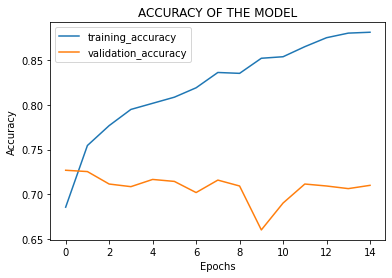

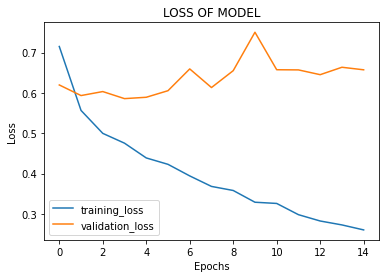

43/43 [==============================] - 3s 64ms/step


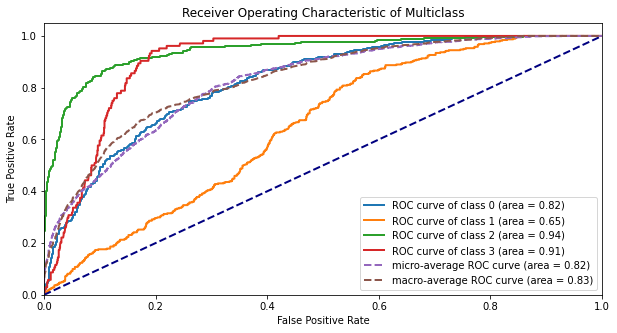

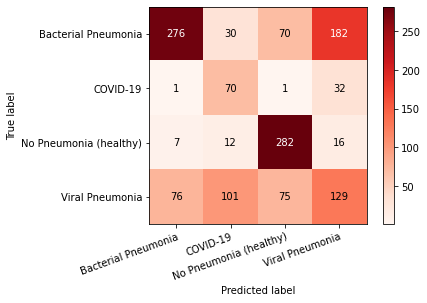

                        precision    recall  f1-score   support

   Bacterial Pneumonia       0.77      0.49      0.60       558
              COVID-19       0.33      0.67      0.44       104
No Pneumonia (healthy)       0.66      0.89      0.76       317
       Viral Pneumonia       0.36      0.34      0.35       381

              accuracy                           0.56      1360
             macro avg       0.53      0.60      0.54      1360
          weighted avg       0.59      0.56      0.55      1360



In [26]:
plot_acc_loss(tl_trained)

y_pred = tl_model.predict(X_test_norm) 
plot_ROC_curve(y_pred,y_test_onehot,num_classes)

plot_cm(label_map,y_pred,y_test)

table_p_r_f1(y_test,y_pred,label_map)

In [2]:
# Imports
import warnings
warnings.simplefilter(action='ignore')
import keras
import json
import numpy as np
import glob
import pandas as pd

import urllib.request
from PIL import Image
from keras import layers, models
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from skimage import io, color
import random
from keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from keras.models import Model
from keras.callbacks import EarlyStopping
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.backend as K
import matplotlib.pyplot as plt
from keras.regularizers import l2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


######################################################################################################################################
######################################################################################################################################
# SAMPLE RESTRICTION RELATED FUNCTIONS
######################################################################################################################################
######################################################################################################################################

def collect_labels(data, labels):
    
    img_label_dict = {}
    
    # relate image and label index in dictionary
    for i in range(len(labels)):
        img_label_dict[i] = labels[i]
        
        
    # Store all the indexes by label
    BP_index = {k for k,v in img_label_dict.items() if v == 'Bacterial Pneumonia'}
    VP_index = {k for k,v in img_label_dict.items() if v == 'Viral Pneumonia'}
    NP_index = {k for k,v in img_label_dict.items() if v == 'No Pneumonia (healthy)'}
    
    CV_index = {k for k,v in img_label_dict.items() if v == 'COVID-19'}

    return [BP_index, NP_index, VP_index, CV_index], img_label_dict


def restrict_sample(proportion, data, labels):

    classified_instances, img_label_dict = collect_labels(data, labels)

    restricted_sample_indices = set()
    restricted_img_label_dict = {}

    for i in classified_instances[:-1]:
        tmp = random.sample(i, k=int(len(i)*proportion))
        for e in tmp:
            restricted_sample_indices.add(e)

    restricted_sample_indices = restricted_sample_indices.union(classified_instances[-1])
    restricted_sample_labels = [img_label_dict.get(i) for i in restricted_sample_indices]
    restricted_sample = [data[i] for i in restricted_sample_indices]

    return restricted_sample, restricted_sample_labels


def restrict_sample_vp_imb(proportion, data, labels):

    classified_instances, img_label_dict = collect_labels(data, labels)

    restricted_sample_indices = set()
    restricted_img_label_dict = {}

    for i in classified_instances[:-2]:
        tmp = random.sample(i, k=int(len(i)*proportion))
        for e in tmp:
            restricted_sample_indices.add(e)
    
    tmp = random.sample(classified_instances[-2], k=int(len(i)*(proportion+0.2)))
    for e in tmp:
            restricted_sample_indices.add(e)

    restricted_sample_indices = restricted_sample_indices.union(classified_instances[-1])
    restricted_sample_labels = [img_label_dict.get(i) for i in restricted_sample_indices]
    restricted_sample = [data[i] for i in restricted_sample_indices]

    return restricted_sample, restricted_sample_labels


def generate_summary(sum_type, original, new):

    if sum_type == "R":
        sum_type = "RESTRICTION"
    elif sum_type == "A":
        sum_type = "AUGMENTATION"

    print(f"SAMPLE {sum_type} SUMMARY")
    print("(Only covering training sample)")
    print("")
    print("")
    print("ORIGINAL TRAINING SAMPLE")
    print(F"Original number of instances: {len(original)}")
    print(f"Original instance distribution by class: \n {pd.Series(original).value_counts()}")
    print("")
    print("NEW TRAINING SAMPLE")
    print(f"Number of instances in new sample: {len(new)}")
    print(f"Instance distribution by class in new sample: \n {pd.Series(new).value_counts()}")

######################################################################################################################################
######################################################################################################################################
# DATA AUGMENTATION RELATED FUNCTIONS
######################################################################################################################################
######################################################################################################################################

def rotate90(image):
    return tf.image.rot90(image)

def rotate180(image):
    return tf.image.rot90(rotate90(image))

def rotate270(image):
    return tf.image.rot90(rotate180(image))  

def augment_sample(features, labels, a_rotate = False):

    img_label_dict = {}
    
    # relate image and label index in dictionary
    for i in range(len(labels)):
        img_label_dict[i] = labels[i]
        
        
    # Store all the indexes by label
    BP_index = {k for k,v in img_label_dict.items() if v == 'Bacterial Pneumonia'}
    VP_index = {k for k,v in img_label_dict.items() if v == 'Viral Pneumonia'}
    NP_index = {k for k,v in img_label_dict.items() if v == 'No Pneumonia (healthy)'}
    
    CV_index = {k for k,v in img_label_dict.items() if v == 'COVID-19'}
    
    # Create list with all the previous lists so it can be used to iterate (except covid)
    labels_collect = [BP_index, VP_index, NP_index]
    
    # Select random sample of 50% of each element which is not covid to apply flip transformation
    # The remaining 50% stays the same
    
    not_to_transform = set()
    to_transform = set()
    
    for i in labels_collect:
        for e in i: 
            not_to_transform.add(e)
            
    #Select 15% of no cv instances at random to include augmented copies of these in the dataset
    
    for i in labels_collect:        
        tmp = random.sample(i, k=int(len(i)*0.15))
        for e in tmp:
            to_transform.add(e)
            
    # Creating list for keeping track of the labels for the new data        
    new_labels = []

    for i in not_to_transform:
        new_labels.append(img_label_dict.get(i))
    for i in to_transform:
        new_labels.append(img_label_dict.get(i))
    
    # Transform the sampled and include the sample no_cv images
    new_features_no_cv = []
    
    for i in not_to_transform: # Include regular instances in the new set
            new_features_no_cv.append(features[i])
            
    for i in to_transform: # Include augmented instances are added to the new list
            new_features_no_cv.append(tf.image.flip_left_right(features[i]))
    
    # Include in new feature set covid x-rays + augmented covid x-rays
    new_features_cv = []
    
    for i in CV_index:
        new_features_cv.append(tf.image.flip_left_right(features[i]))
        new_features_cv.append(features[i])
    
    if a_rotate == False:
        
        new_labels_cv = ['COVID-19' for i in range(len(new_features_cv))]
        
        augmentedfeatures = new_features_no_cv + new_features_cv
        augmentedlabels = new_labels + new_labels_cv
        
        return augmentedfeatures, augmentedlabels
        
    # AUGMENTATION - ROTATE    
    elif a_rotate == True:
        
        #Divide no_cv instances in 3 groups (30%, 35%, 35%)
        
        fd_features, features_1, fd_labels, labels_1 = train_test_split(new_features_no_cv, new_labels, 
                                                            test_size=0.3, random_state=42)
        
        features_2, features_3, labels_2, labels_3 = train_test_split(fd_features, fd_labels, 
                                                            test_size=0.5, random_state=42)
        
        # Apply rotate90 to the first group and add both original and rotated to the new feature set alongside the labels
        
        new_features_2 = []
        new_labels_2 = []
        
        for i in range(len(features_1)):
            new_features_2.append(features_1[i])
            new_features_2.append(rotate90(features_1[i]))
            for e in range(2):
                new_labels_2.append(labels_1[i])
        
        # Idem 180
        
        for i in range(len(features_2)):
            new_features_2.append(features_2[i])
            new_features_2.append(rotate180(features_2[i]))
            for e in range(2):
                new_labels_2.append(labels_2[i])
        
        # Idem 270
        
        for i in range(len(features_3)):
            new_features_2.append(features_3[i])
            new_features_2.append(rotate270(features_3[i]))
            for e in range(2):
                new_labels_2.append(labels_3[i])
        
        #Apply all rotations to all cv features and add them to the new set alongside the originals and the labels
        
        for i in range(len(new_features_cv)):
            new_features_2.append(new_features_cv[i])
            new_features_2.append(rotate90(features_3[i]))
            new_features_2.append(rotate180(features_3[i]))
            new_features_2.append(rotate270(features_3[i]))
            for e in range(4):
                new_labels_2.append('COVID-19')
        
        
        augmentedfeatures = new_features_2
        augmentedlabels = new_labels_2
        
        return augmentedfeatures, augmentedlabels


######################################################################################################################################
######################################################################################################################################
# BASELINE MODEL
######################################################################################################################################
######################################################################################################################################

def build_baseline_model():
    model = keras.Sequential([
        # Convolutional layers
        keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(156, 156, 3)),
        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Dense layers
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(4, activation='softmax')
    ])

    # Compile the model with appropriate loss function, optimizer, and metrics
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model



######################################################################################################################################
######################################################################################################################################
# TUNED MODEL
######################################################################################################################################
######################################################################################################################################


def build_tuned_model():
    model = keras.Sequential([
    # Convolutional layers
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.01), input_shape=(156, 156, 3),kernel_regularizer=l2(0.01)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3),  activation=keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=l2(0.01)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3),  activation=keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # (CHANGE VS BASELINE) Adding another pack of Conv2D and MaxPooling2D layers
    #keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    #keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    #keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3),  activation=keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=l2(0.01)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3),  activation=keras.layers.LeakyReLU(alpha=0.01), kernel_regularizer=l2(0.01)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
  
    # Dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)),
    # (CHANGE VS BASELINE) Adding Dropout
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1), kernel_regularizer=l2(0.01)),
    # (CHANGE VS BASELINE) Adding an extra dense layer
    #keras.layers.Dense(16, activation=keras.layers.LeakyReLU(alpha=0.1)),
    # (CHANGE VS BASELINE) Adding Dropout
    #keras.layers.Dropout(0.3)
    keras.layers.Dense(4, activation='softmax')])
    # Compile the model with appropriate loss function, optimizer, and metrics
    # (CHANGE VS BASELINE) Adding the optimal lr
    optim = keras.optimizers.Nadam(learning_rate=0.001) #(CHANGE VS BASELINE) optimizer = adam, nadam, sgd, rmsprop

    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    return model



######################################################################################################################################
######################################################################################################################################
# HYBRID MODEL
######################################################################################################################################
######################################################################################################################################

def build_h_model():
    '''restnet blocks'''
    input_shape = (156, 156, 3)
    inputs = keras.Input(shape=input_shape)
     # Convolutional layers
    x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.01),  padding='same')(inputs)
    x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3),  activation=keras.layers.LeakyReLU(alpha=0.01), padding='same')(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    #  block 1
    out=x
    x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.1), padding='same')(x)
    x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3),  activation=keras.layers.LeakyReLU(alpha=0.1), padding='same')(x)
    x = keras.layers.add([out, x])
    x = keras.layers.LeakyReLU(alpha=0.1)(x)

    #  block 2
    out=x
    x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.1), padding='same')(x)
    x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3),  activation=keras.layers.LeakyReLU(alpha=0.1), padding='same')(x)
    x = keras.layers.add([out, x])
    x = keras.layers.LeakyReLU(alpha=0.1)(x)
    #  block 3
    out=x
    x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.1), padding='same')(x)
    x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3),  activation=keras.layers.LeakyReLU(alpha=0.1), padding='same')(x)
    x = keras.layers.add([out, x])
    x = keras.layers.LeakyReLU(alpha=0.1)(x)
    # Dense layers
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1))(x)
    x = keras.layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.1))(x)
    outputs = keras.layers.Dense(4, activation='softmax')(x)
    optim = keras.optimizers.Nadam(learning_rate=0.001) 


    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs, name='h_model')

    # Compile the model with appropriate loss function, optimizer, and metrics
    model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
    return model


######################################################################################################################################
######################################################################################################################################
# PLOTTING/PERFORMANCE FUNCTIONS
######################################################################################################################################
######################################################################################################################################

def plot_acc_loss(histo):
  ##Plot for the accuracy of the baseline model 
  accuracy_train = histo.history['accuracy']
  accuracy_val = histo.history['val_accuracy']
  plt.plot(accuracy_train, label='training_accuracy')
  plt.plot(accuracy_val, label='validation_accuracy')
  plt.title('ACCURACY OF THE MODEL')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  ##Plot for the loss of the baseline model 
  loss_train = histo.history['loss']
  loss_val = histo.history['val_loss']
  plt.plot(loss_train, label='training_loss')
  plt.plot(loss_val, label='validation_loss')
  plt.title('LOSS OF MODEL')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  return 


def plot_ROC_curve(y_predict,y_test,num_clas): 

  fpr = {}
  tpr = {}
  roc_auc = {}
  #calculating roc for each class
  for i in range(num_clas):
      fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_predict[:,i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  
  # calculating micro-average ROC curve and  area
  fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_predict.ravel())
  roc_auc_micro = roc_auc_score(y_test.ravel(), y_predict.ravel())

  # Compute macro-average ROC curve and  area
  fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(num_clas)]))
  tpr_macro = np.zeros_like(fpr_macro)
  for i in range(num_clas):
      tpr_macro += np.interp(fpr_macro, fpr[i], tpr[i])
  tpr_macro /= num_clas
  roc_auc_macro = auc(fpr_macro, tpr_macro)

  #Plot the ROC curve for each class using matplotlib.pyplot.plot()
  plt.figure(figsize=(10, 5))
  lw = 2
  for i in range(num_clas):
      plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.plot(fpr_micro, tpr_micro,lw=lw, linestyle='--', label='micro-average ROC curve (area = %0.2f)' % (roc_auc_micro))
  plt.plot(fpr_macro, tpr_macro,lw=lw, linestyle='--', label='macro-average ROC curve (area = %0.2f)' % (roc_auc_macro))
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic of Multiclass')
  plt.legend(loc="lower right")
  plt.show()
  return 


def plot_cm(label_ma,y_predict,y_tes):
  #reversing pred to categorical so to get the labels 
  inverse_label_map = {v: k for k, v in label_ma.items()}  # invert the label_map
  y_pred_decoded_numerical = np.argmax(y_predict, axis=1)
  y_pred_decoded_categorical = np.vectorize(inverse_label_map.get)(y_pred_decoded_numerical)

  #confusion matrix 
  
  cm = confusion_matrix(y_tes, y_pred_decoded_categorical)
  classes = np.unique(y_tes)
  # plot the confusion matrix
  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap='Reds')
  ax.figure.colorbar(im, ax=ax)
  ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=classes, yticklabels=classes, ylabel='True label', xlabel='Predicted label')

  # rotate the labels
  plt.setp(ax.get_xticklabels(), rotation=20, ha="right", rotation_mode="anchor")
  # text annotations like the numbers inside 
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
  plt.show()
  return


def table_p_r_f1(y_tes,y_predict, label_ma):
  
  inverse_label_map = {v: k for k, v in label_ma.items()}  # invert the label_map
  y_pred_decoded_numerical = np.argmax(y_predict, axis=1)
  y_pred_decoded_categorical = np.vectorize(inverse_label_map.get)(y_pred_decoded_numerical)

  print(classification_report(y_test, y_pred_decoded_categorical))